* 鲍士水  2020-12-17

## scikit-learn中的SVM

# A题目

In [59]:
import numpy as np
import matplotlib.pyplot as plt

##数据获取
from sklearn import datasets 

iris = datasets.load_iris()
#取前两个特征
x=iris.data[:,:2]
y=iris.target
## 分割数据
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2,test_size=0.3)

## 特征工程(标准化)

from sklearn.preprocessing import StandardScaler

transfer=StandardScaler()
x_train=transfer.fit_transform(x_train)
x_test=transfer.fit_transform(x_test)
x=transfer.fit_transform(x)

## 机器学习(SVM)
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)

## 模型评估
### 预测值
y_pre =svc.predict(x_test)
print("预测值是：\n",y_pre)

### 准确率值
score = svc.score(x_test,y_test)
print("准确率是：\n",score)

预测值是：
 [0 0 1 0 0 2 0 2 2 0 0 0 0 0 2 2 1 1 2 1 2 2 2 1 1 0 0 2 0 2 2 0 1 2 1 0 2
 2 1 2 2 2 2 1 0]
准确率是：
 0.8


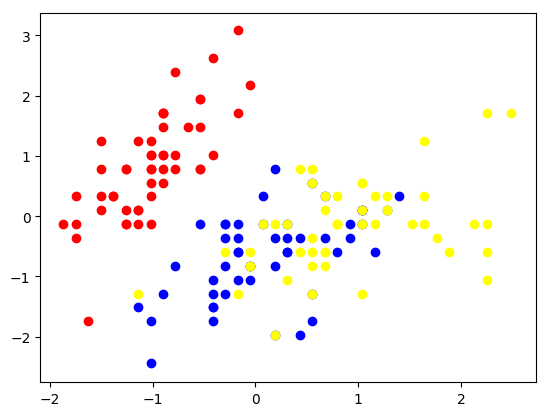

In [60]:
##可视化
plt.scatter(x[y==0, 0], x[y==0, 1],color = 'red')
plt.scatter(x[y==1, 0], x[y==1, 1],color = 'blue')
plt.scatter(x[y==2, 0], x[y==2, 1],color = 'yellow')
plt.show()

In [61]:
def plot_decision_boundary(model, axis):  
    # meshgrid函数用两个坐标轴上的点在平面上画格，返回坐标矩阵
    x0, x1 = np.meshgrid(
    # 随机两组数，起始值和密度由坐标轴的起始值决定
    np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)).reshape(-1, 1),
    np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100)).reshape(-1, 1),
    )
    
    # ravel()方法将高维数组降为一维数组，c_[]将两个数组以列的形式拼接起来，形成矩阵
    x_new=np.c_[x0.ravel(),x1.ravel()]
    
    # 通过训练好的逻辑回归模型，预测平面上这些点的分类
    y_predict = model.predict(x_new)
    
    zz=y_predict.reshape(x0.shape)
    
    # 设置色彩表
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap (['#EF9A9A','#FFF59D','#90CAF9'])
    
    # 绘制等高线，并且填充等高区域的颜色
    plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap) 

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


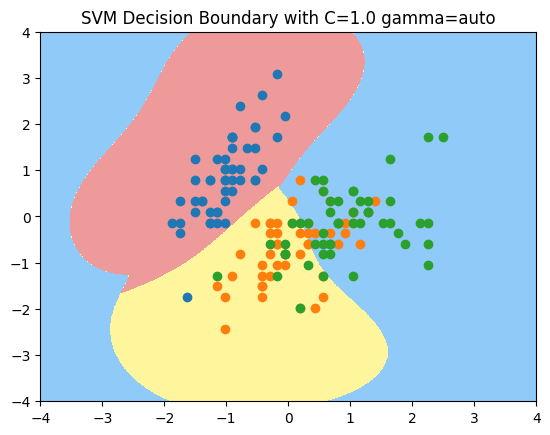

In [76]:
# 绘制决策边界
plot_decision_boundary(svc, axis=[-4, 4, -4,4])
plt.scatter(x[y==0, 0], x[y==0, 1])
plt.scatter(x[y==1, 0], x[y==1, 1])
plt.scatter(x[y==2, 0], x[y==2, 1])
plt.title('SVM Decision Boundary with C=1.0 gamma=auto')  # 添加图表标题
plt.show()

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


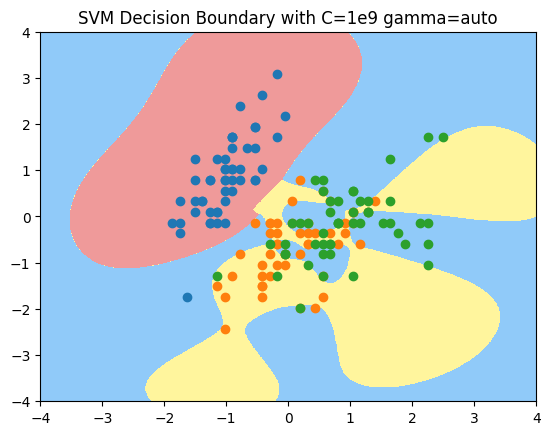

In [77]:
## 机器学习(SVM)
from sklearn.svm import SVC
svc1 = SVC(kernel='rbf', C=1e9, gamma='auto')
svc1.fit(x_train,y_train)

# 绘制决策边界
plot_decision_boundary(svc1, axis=[-4, 4, -4, 4])
plt.scatter(x[y==0, 0], x[y==0, 1])
plt.scatter(x[y==1, 0], x[y==1, 1])
plt.scatter(x[y==2, 0], x[y==2, 1])
plt.title('SVM Decision Boundary with C=1e9 gamma=auto')  # 添加图表标题
plt.show()

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


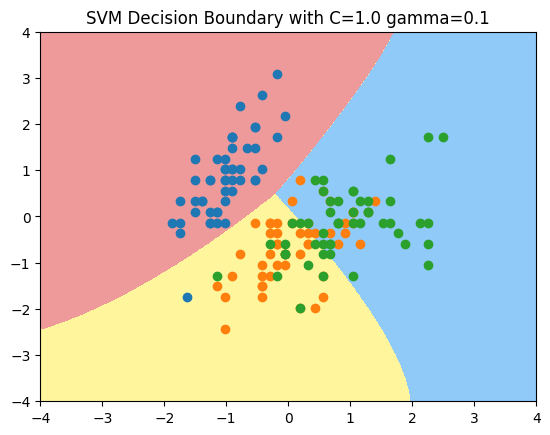

In [78]:
## 机器学习(SVM)
from sklearn.svm import SVC
svc2 = SVC(C=1,gamma=0.1)
svc2.fit(x_train,y_train)
# 绘制决策边界
plot_decision_boundary(svc2, axis=[-4, 4, -4, 4])
plt.scatter(x[y==0, 0], x[y==0, 1])
plt.scatter(x[y==1, 0], x[y==1, 1])
plt.scatter(x[y==2, 0], x[y==2, 1])
plt.title('SVM Decision Boundary with C=1.0 gamma=0.1')  # 添加图表标题
plt.show()